In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [85]:
train = pd.read_csv('titanic_train.csv')

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

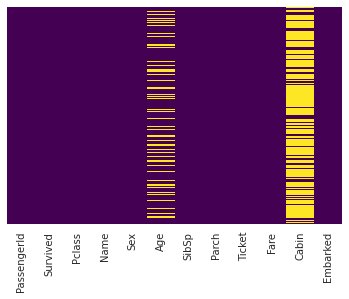

In [88]:
# Creating a heatmap for the null and true values 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [89]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

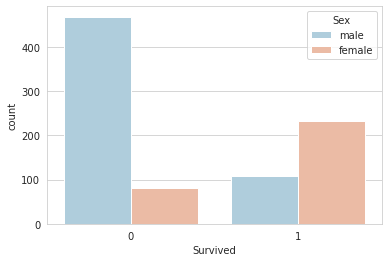

In [90]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

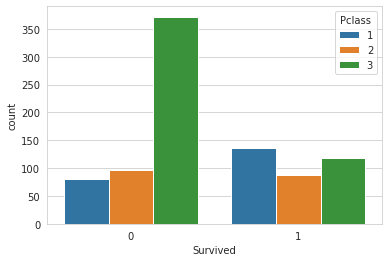

In [91]:
sns.countplot(x='Survived',data=train,hue='Pclass')

/home/arun/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

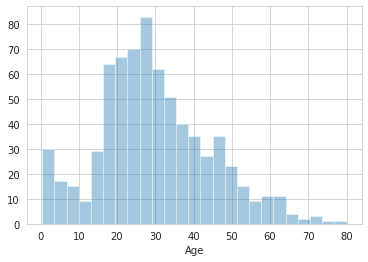

In [92]:
# Histogram of the age travelled in titanic

sns.distplot(train['Age'].dropna(),kde=False,bins=25)

<AxesSubplot:ylabel='Frequency'>

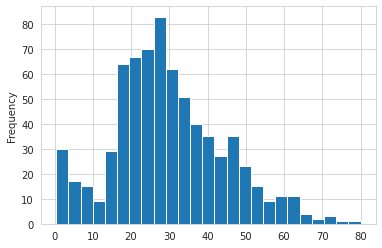

In [93]:
# Pandas hstogram
train['Age'].plot.hist(bins=25)

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

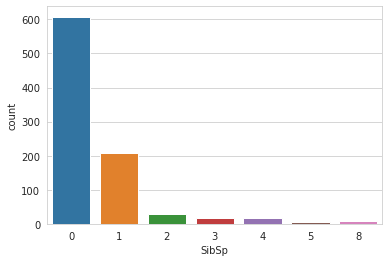

In [95]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:ylabel='Frequency'>

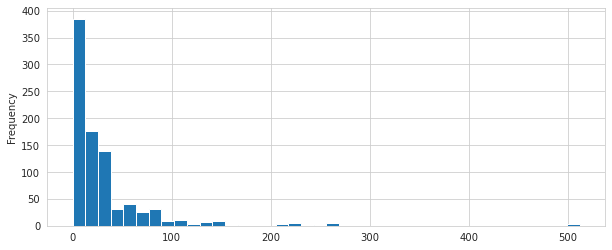

In [96]:
train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [97]:
# pip install cufflinks

import cufflinks as cf

In [98]:
cf.go_offline()

In [99]:
# train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

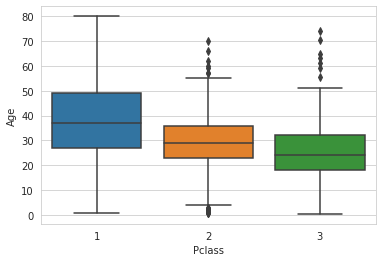

In [100]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [101]:
def imp_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [102]:
train['Age'] = train[['Age','Pclass']].apply(imp_age,axis=1)

<AxesSubplot:>

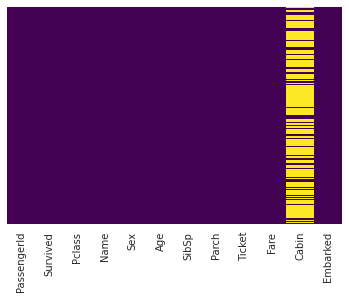

In [103]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [104]:
# Clearing the column with missing data

train.drop('Cabin',axis=1,inplace=True)

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

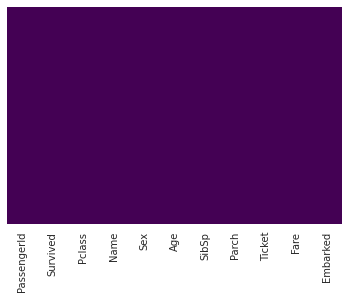

In [106]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [109]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [110]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [111]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [114]:
prach = pd.get_dummies(train['Parch'],drop_first=True)
prach

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [115]:
train = pd.concat([train,sex,embark,prach],axis=1)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,male,Q,S,1,2,3,4,5,6
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,0,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,0,1,0,0,0,0,0,0


In [117]:
train.drop(['Sex','Embarked','Parch','Name','Ticket'],axis=1,inplace=True)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,male,Q,S,male,Q,S,1,2,3,4,5,6
0,1,0,3,22.0,1,7.2500,1,0,1,1,0,1,0,0,0,0,0,0
1,2,1,1,38.0,1,71.2833,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,8.0500,1,0,1,1,0,1,0,0,0,0,0,0


In [119]:
train.drop('PassengerId',axis=1,inplace=True)

In [120]:
train.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S,male,Q,S,1,2,3,4,5,6
0,0,3,22.0,1,7.2500,1,0,1,1,0,1,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,1,0,1,1,0,1,0,0,0,0,0,0


In [121]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [122]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [123]:
lgmodel = LogisticRegression()

In [124]:
lgmodel.fit(X_train,y_train)

/home/arun/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/home/arun/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [125]:
predictions = lgmodel.predict(X_test)

/home/arun/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
print(confusion_matrix(y_test,predictions))

[[137  20]
 [ 30  81]]
